# Multivariate linear regresion

# **Normal equation**

In [1]:
import numpy as np
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=100, n_features=3, n_informative=1, random_state=0, noise=100)
x_b = np.c_[np.ones((x.shape[0],1)),x]

#call inverse function from linear algebra module
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta_best)

#prediction
x_n = np.array([[-3,3,10],[5,2,15]])
x_n_b = np.c_[np.ones((x_n.shape[0],1)), x_n]
y_p = x_n_b.dot(theta_best)
print("y predict = ",y_p)



import matplotlib.pyplot as plt
plt.plot(x_n[:,0], y_p,"r-")
plt.plot(x[:,0],y, "b.")
plt.show()

plt.plot(x_n[:,1], y_p,"r-")
plt.plot(x[:,1],y, "b.")
plt.show()

plt.plot(x_n[:,2], y_p,"r-")
plt.plot(x[:,2],y, "b.")
plt.show()


theta =  [-26.7405953   46.20215542  -5.04125804   3.37581693]
y predict =  [-146.71266643  244.82491962]


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Exercise1 <br>
1.1 Change a number of features to 4 and plot 4 graphs

# **Sklearn**

y predict =  [-129.74185457  218.87116728]


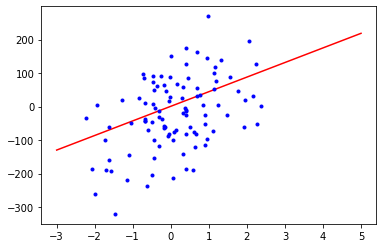

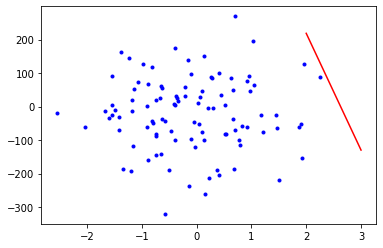

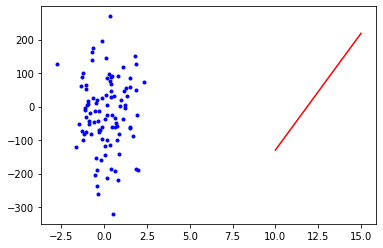

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression 

#x, y = make_regression(n_samples=1000, n_features=2, n_informative=1, random_state=0, noise=100) 
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(x, y)


#prediction
#x_n = np.array([[-3,3],[5,2]])
y_p = lin_reg.predict(x_n)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.plot(x_n[:,0], y_p,"r-")
plt.plot(x[:,0],y, "b.")
plt.show()

plt.plot(x_n[:,1], y_p,"r-")
plt.plot(x[:,1],y, "b.")
plt.show()

plt.plot(x_n[:,2], y_p,"r-")
plt.plot(x[:,2],y, "b.")
plt.show()

# **Batch Gradient descent (Multiple linear regression)**


Converged, iterations:  1555 / 100000
theta  [[-26.74041364]
 [ 46.20202207]
 [ -5.04110398]
 [  3.37571293]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


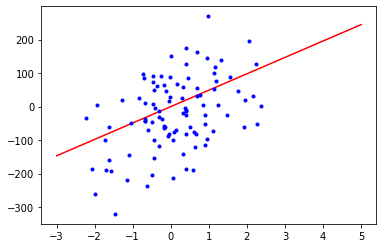

BGD
Mean of Squared Errors =  9321.122053296496
R2 score =  0.19150557871510676


In [3]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats

def cost_function(theta, x, y, m):
    
    y_predict = theta.T.dot(x.T)
    #print("y_predict ",y_predict)
    error = np.sum((y_predict-y)**2)
    #print("error ", error)
    return error

def gradient_descent(alpha, x, y, ep=0.0000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
    #t = np.ones((x.shape[1],1))
    #print("t ", t)
  
    # total error, J(theta)
    J = cost_function(t,x,y,m)
    #print("Iteration 0 --> J=",J," t0=",t0," t1=",t1)

    # Iterate Loop
    while not converged:
        
        #print("theta.shape ",t.shape)
        #print("x.shape ",x.shape)
        y_predict = t.T.dot(x.T)
        
        error = y_predict-y
        grad = x.T.dot(error.T)

        t = t - alpha * (1/m) * (grad)
        
        # error
        e = cost_function(t,x,y,m)
        
        if abs(J-e) <= ep:
            print("Converged, iterations: ", iter, "/", max_iter)
            converged = True
    
        J = e   # update error s
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max iterations exceeded!')
            converged = True

    return t


if __name__ == '__main__':

    #x, y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=1)
    #x_b = np.c_[np.ones((x.shape[0],1)),x]
    #x = np.array([0,2,3]).T
    #y = np.array([1,1,4])
    #x_b = np.c_[np.ones((3,1)),x]
    
    alpha = 0.01 # learning rate

    #Modify x_b
    '''x_b[:,3] = x_b[:,3] * 100000
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(x_b)
    x_b = scaler.transform(x_b)
    
    from sklearn.preprocessing import MinMaxScaler
    scaler2 = MinMaxScaler()
    scaler2.fit(x_b)
    x_b = scaler2.transform(x_b)'''
    
    theta_bgd = gradient_descent(alpha, x_b, y, max_iter=100000)
    print ("theta ", theta_bgd) 
    
    #x2_n = np.array([[-3,3],[5,2]])
    #x2_n_b = np.c_[np.ones((x2_n.shape[0],1)), x2_n]
    y_p = x_n_b.dot(theta_bgd)

    # sklearn
    #lin_reg = LinearRegression()
    #lin_reg.fit(x, y)
    
    #x1_n = np.array([[-3,3],[5,2]])
    #y1_p = lin_reg.predict(x1_n)
    #print("y predict = ",y1_p)

    #print("SKlearn theta0 = ", lin_reg.intercept_, " , coef ", lin_reg.coef_)
    
    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()
    
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    y3_p = x_b.dot(theta_bgd)
    
    print("BGD")
    print("Mean of Squared Errors = ", mean_squared_error(y, y3_p))
    #print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
    print("R2 score = ", r2_score(y, y3_p))


# Feature Scaling

print("Original data")
x, y = make_regression(n_samples=5, n_features=2, n_informative=1, random_state=0, noise=1)
x2 = x
y2 = y
print(x)

print("After modifying x2")
x[:,1] = x[:,1]*10000
print(x)

print("Standardization")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
print(x)

print("Normalization")
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(x2)
x2 = scaler2.transform(x2)
print(x2)

# Stochastic GD

Max iterations exceeded!
theta  [[-19.11948008]
 [ 42.24531962]
 [ -1.99558482]
 [  4.74820939]]


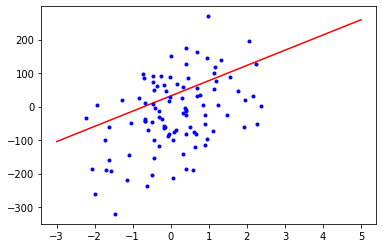

SGD
Mean of Squared Errors =  9395.07109534033
R2 score =  0.18509139514257666


In [4]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats
import time


def cost_function(theta, x, y, m):
    y_predict = theta.T.dot(x.T)
    error = np.sum((y_predict-y)**2)
    return error

def gradient_descent(alpha, x, y, ep=0.0000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
   
    # total error, J(theta)
    J = cost_function(t,x,y,m)
  
    # Iterate Loop
    while not converged:
        
        
        rand_ind = np.random.randint(0,m)
        X_i = x[rand_ind,:]
        y_i = y[rand_ind].reshape(1,1)
        
        y_predict = t.T.dot(X_i)
        error = y_predict-y_i
        X_i = X_i.reshape(1,x.shape[1])
        grad = X_i.T.dot(error.T)
        
        #ld = 0.1
        #alpha_t = alpha/(1+alpha*ld*iter)
        #print("learning schedule = ", alpha_t)
        alpha_t = alpha
        
        t = t - alpha_t * (1/1) * (grad)
        
        # error
        e = cost_function(t,X_i,y_i,m)
        
        if abs(J-e) <= ep:
            print("Converged, iterations: ", iter, "/", max_iter)
            converged = True
    
        J = e   # update error s
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max iterations exceeded!')
            converged = True

    return t


if __name__ == '__main__':

    #x, y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=35)
    #x_b = np.c_[np.ones((x.shape[0],1)),x]
    
    alpha = 0.01 # learning rate

    theta_sgd = gradient_descent(alpha, x_b, y, max_iter=10000)
    print ("theta ", theta_sgd) 
    
    y_p = x_n_b.dot(theta_sgd)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()
   
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    y2_p = x_b.dot(theta_sgd)
    #print("y predict = ",y2_p)
    
    print("SGD")
    print("Mean of Squared Errors = ", mean_squared_error(y, y2_p))
    #print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
    print("R2 score = ", r2_score(y, y2_p))


# Mini-batch GD

Max iterations exceeded!
theta  [[ 0.948377  ]
 [-6.96701447]
 [94.77952806]]
Max iterations exceeded!
theta  [[ 1.00243767]
 [-6.92767205]
 [94.7850877 ]]


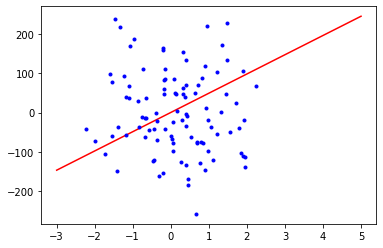

In [5]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats
import time


def cost_function(theta, x, y, m):
    y_predict = theta.T.dot(x.T)
    error = np.sum((y_predict-y)**2)
    return error

def gradient_descent(alpha, x, y, ep=0.00000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
   
    # total error, J(theta)
    J = cost_function(t,x,y,m)
    
    batch_size = 10
  
    # Iterate Loop
    while not converged:
        
        rand_ind = np.random.permutation(m)
        x = x[rand_ind]
        y = y[rand_ind]
        
        for i in range(0,m,batch_size):
            
            X_i = x[i:i+batch_size]
            y_i = y[i:i+batch_size]
        
            y_predict = t.T.dot(X_i.T)
            error = y_predict-y_i
            grad = X_i.T.dot(error.T)

            t = t - alpha * (1/batch_size) * (grad)

            # error
            e = cost_function(t,X_i,y_i,m)

            if abs(J-e) <= ep:
                print("Converged, iterations: ", iter, "/", max_iter)
                converged = True

            J = e   # update error s
            iter += 1  # update iter

            if iter == max_iter:
                print('Max iterations exceeded!')
                converged = True

    return t


if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=35)
    x_b = np.c_[np.ones((x.shape[0],1)),x]
    
    alpha = 0.01 # learning rate

    theta = gradient_descent(alpha, x_b, y, max_iter=10000)
    print ("theta ", theta)
    theta = gradient_descent(alpha, x_b, y, max_iter=10000)
    print ("theta ", theta) 
    
    y_p = x_n_b.dot(theta_best)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()

# Polynomial regression
Reference: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(dataset.head)

<bound method NDFrame.head of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

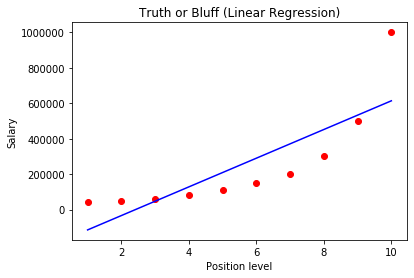

In [8]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

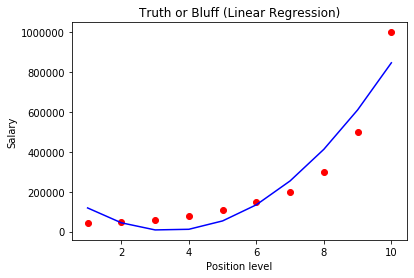

In [9]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [10]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([89187.5])